### Data Science Assessment Data Usage/ Visualisation

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Initial EDA of dataset


In [158]:
# import dataset
dataset = pd.read_csv('Datasets/Diabetes-Dataset-Cleaned-2.csv')

# display information about the dataset
dataset.info()

# Display the first 5 rows of the dataset
dataset.head()

# Display the last 5 rows of the dataset
dataset.tail()

# Statistical Summary

# Display a summary of the dataset
print("\n Summary of the dataset:")
print(dataset.describe())

# Calculate and display the mean of each column
print("\nMean of each column:")
print(dataset.mean())

# Calculate and display the median of each column
print("\nMedian of each column:")
print(dataset.median())

# Calculate and display the standard deviation of each column
print("\nStandard Deviation of each column:")
print(dataset.std())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   float64
 2   BloodPressure             2768 non-null   float64
 3   BMI                       2768 non-null   float64
 4   DiabetesPedigreeFunction  2768 non-null   float64
 5   Age                       2768 non-null   int64  
 6   Outcome                   2768 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 151.5 KB

 Summary of the dataset:
       Pregnancies      Glucose  BloodPressure          BMI  \
count  2768.000000  2768.000000    2768.000000  2768.000000   
mean      3.742775   121.895273      72.404086    32.596665   
std       3.323801    30.500960      11.988255     7.103424   
min       0.000000    44.000000      24.000000    18.200000   
25%   

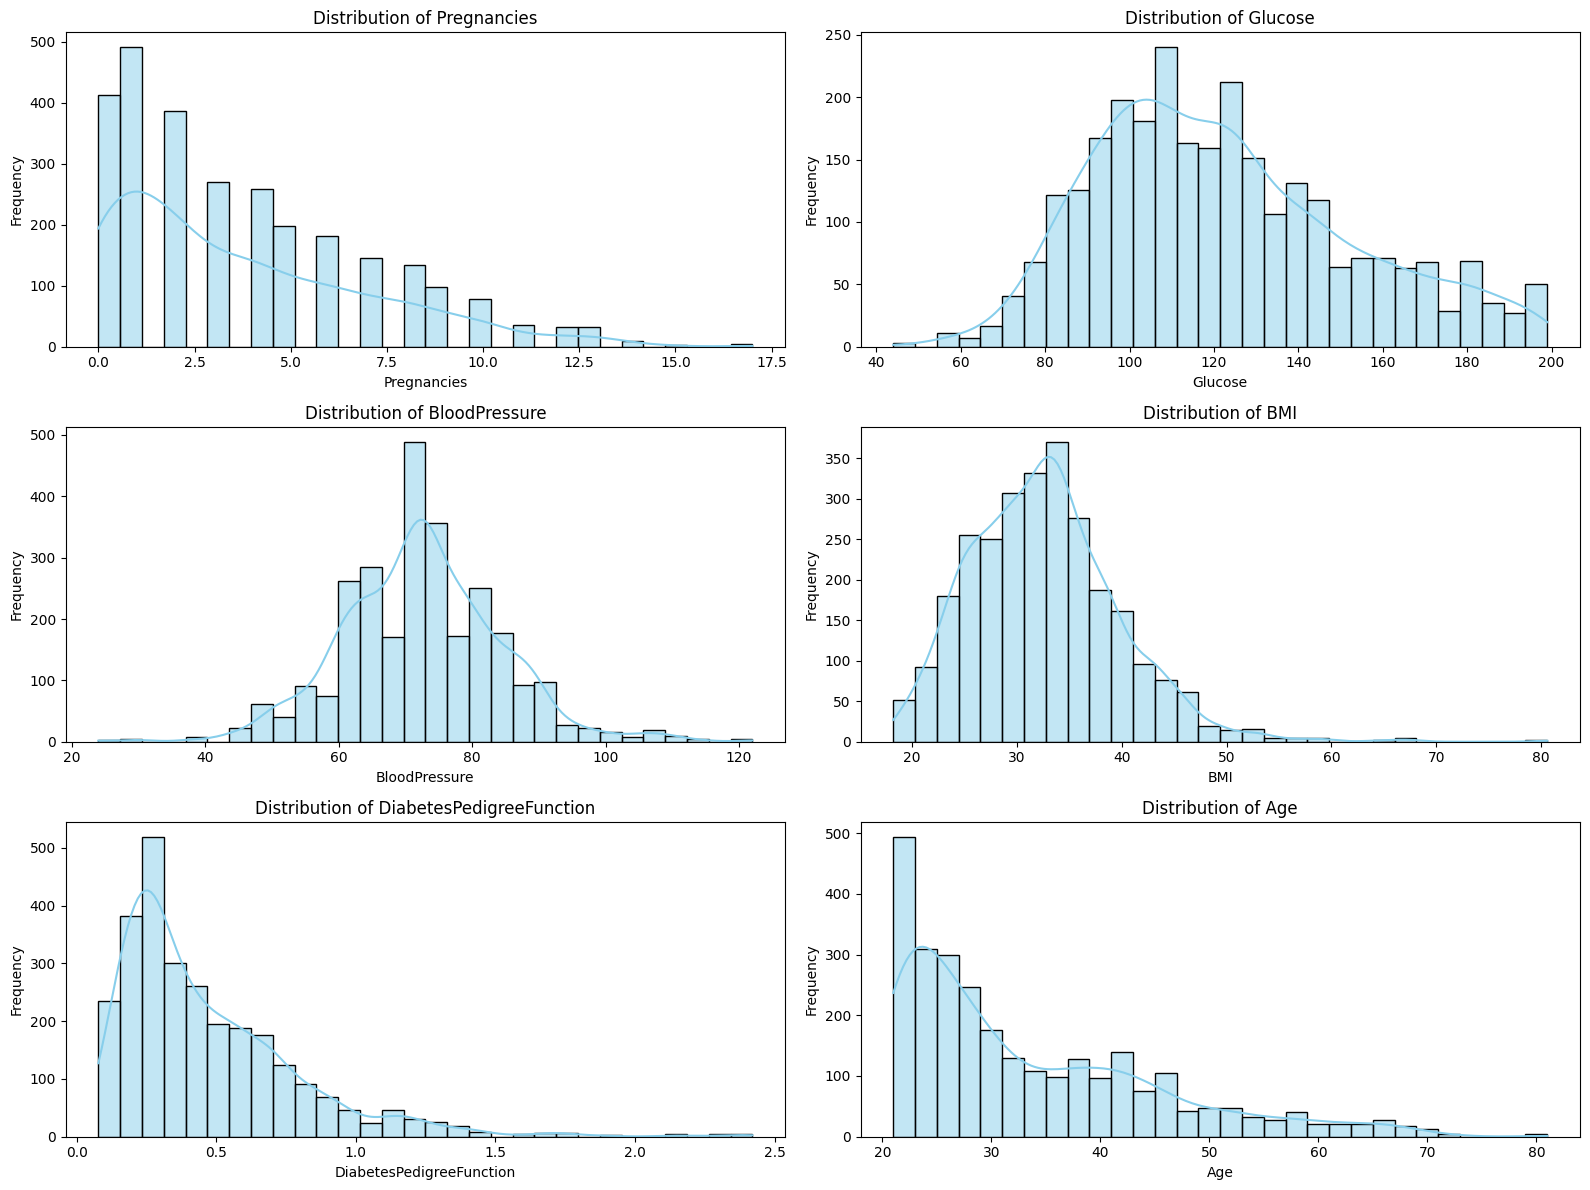

In [159]:
numerical_features = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# show the distribution of each numerical feature - univariate analysis
for i, feature in enumerate(numerical_features):
    sns.histplot(dataset[feature], bins=30, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Initial Visualisation of Data

Outcome
0    65.606936
1    34.393064
Name: proportion, dtype: float64
         Pregnancies     Glucose  BloodPressure        BMI  \
Outcome                                                      
0           3.204295  111.090833      70.910400  31.105279   
1           4.769958  142.505422      75.253387  35.441579   

         DiabetesPedigreeFunction        Age  
Outcome                                       
0                        0.433316  31.111233  
1                        0.543445  36.987395  


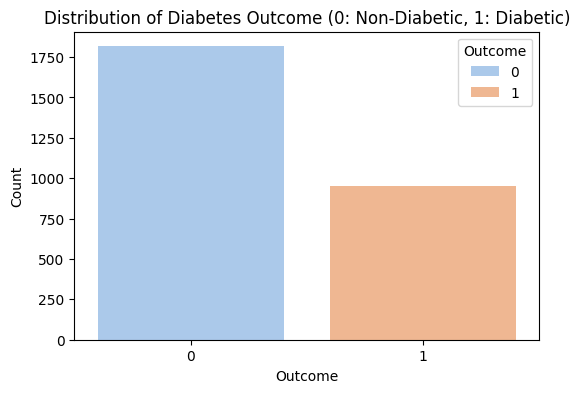

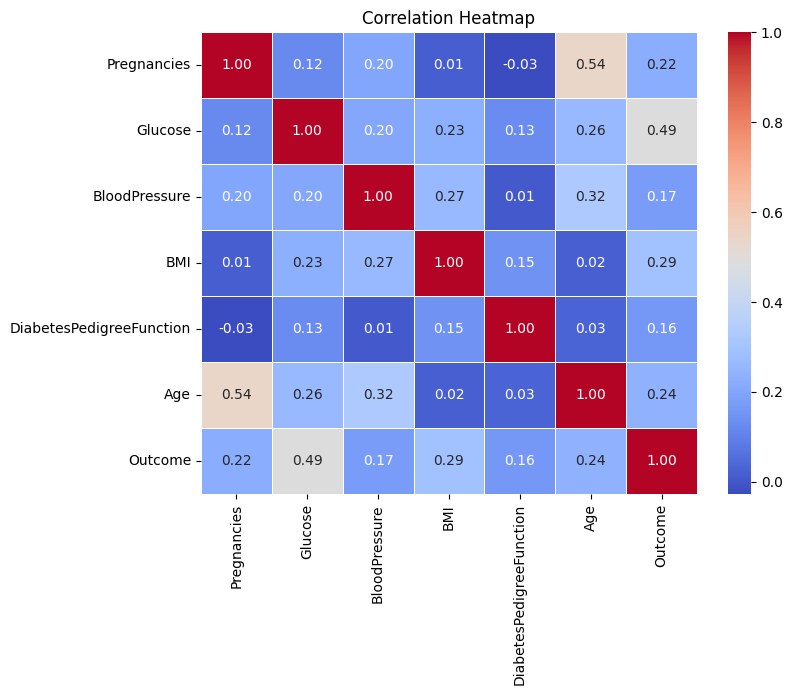

In [160]:

# Outcome distribution
outcome_distribution = dataset['Outcome'].value_counts(normalize=True) * 100
print(outcome_distribution)




# Grouped averages by Outcome
grouped_means = dataset.groupby('Outcome').mean()
print(grouped_means)


# 2. Outcome distribution 
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset, hue='Outcome', palette='pastel')
plt.title('Distribution of Diabetes Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 3. Correlation heatmap - example of multivariate analysis
plt.figure(figsize=(8, 6))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()





From the code above, we can see from the correlation heatmap that variables such as glucose, BMI and Age have a larger Correlation with the Outcome variables (To either have Diabetes or not). This gives us a good marker of what features we could do further analysis on

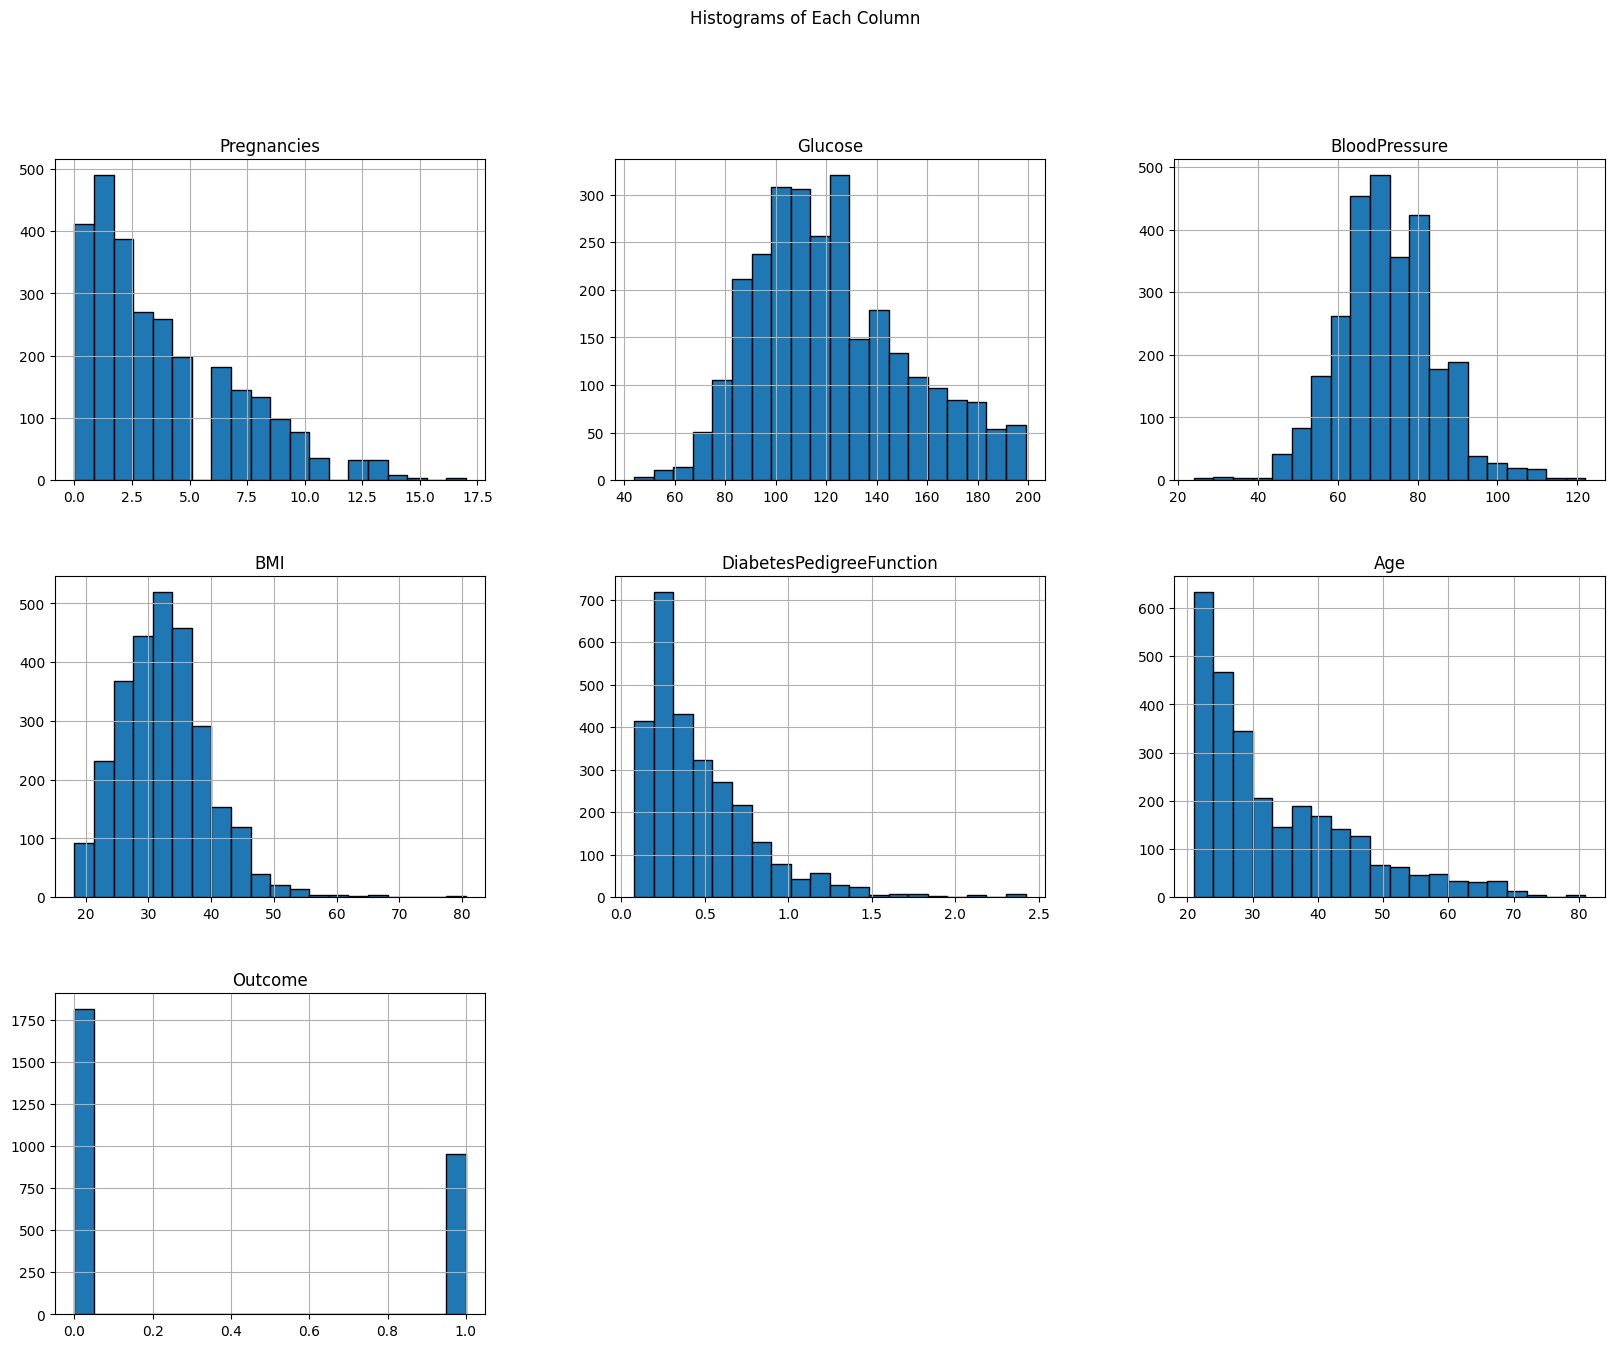

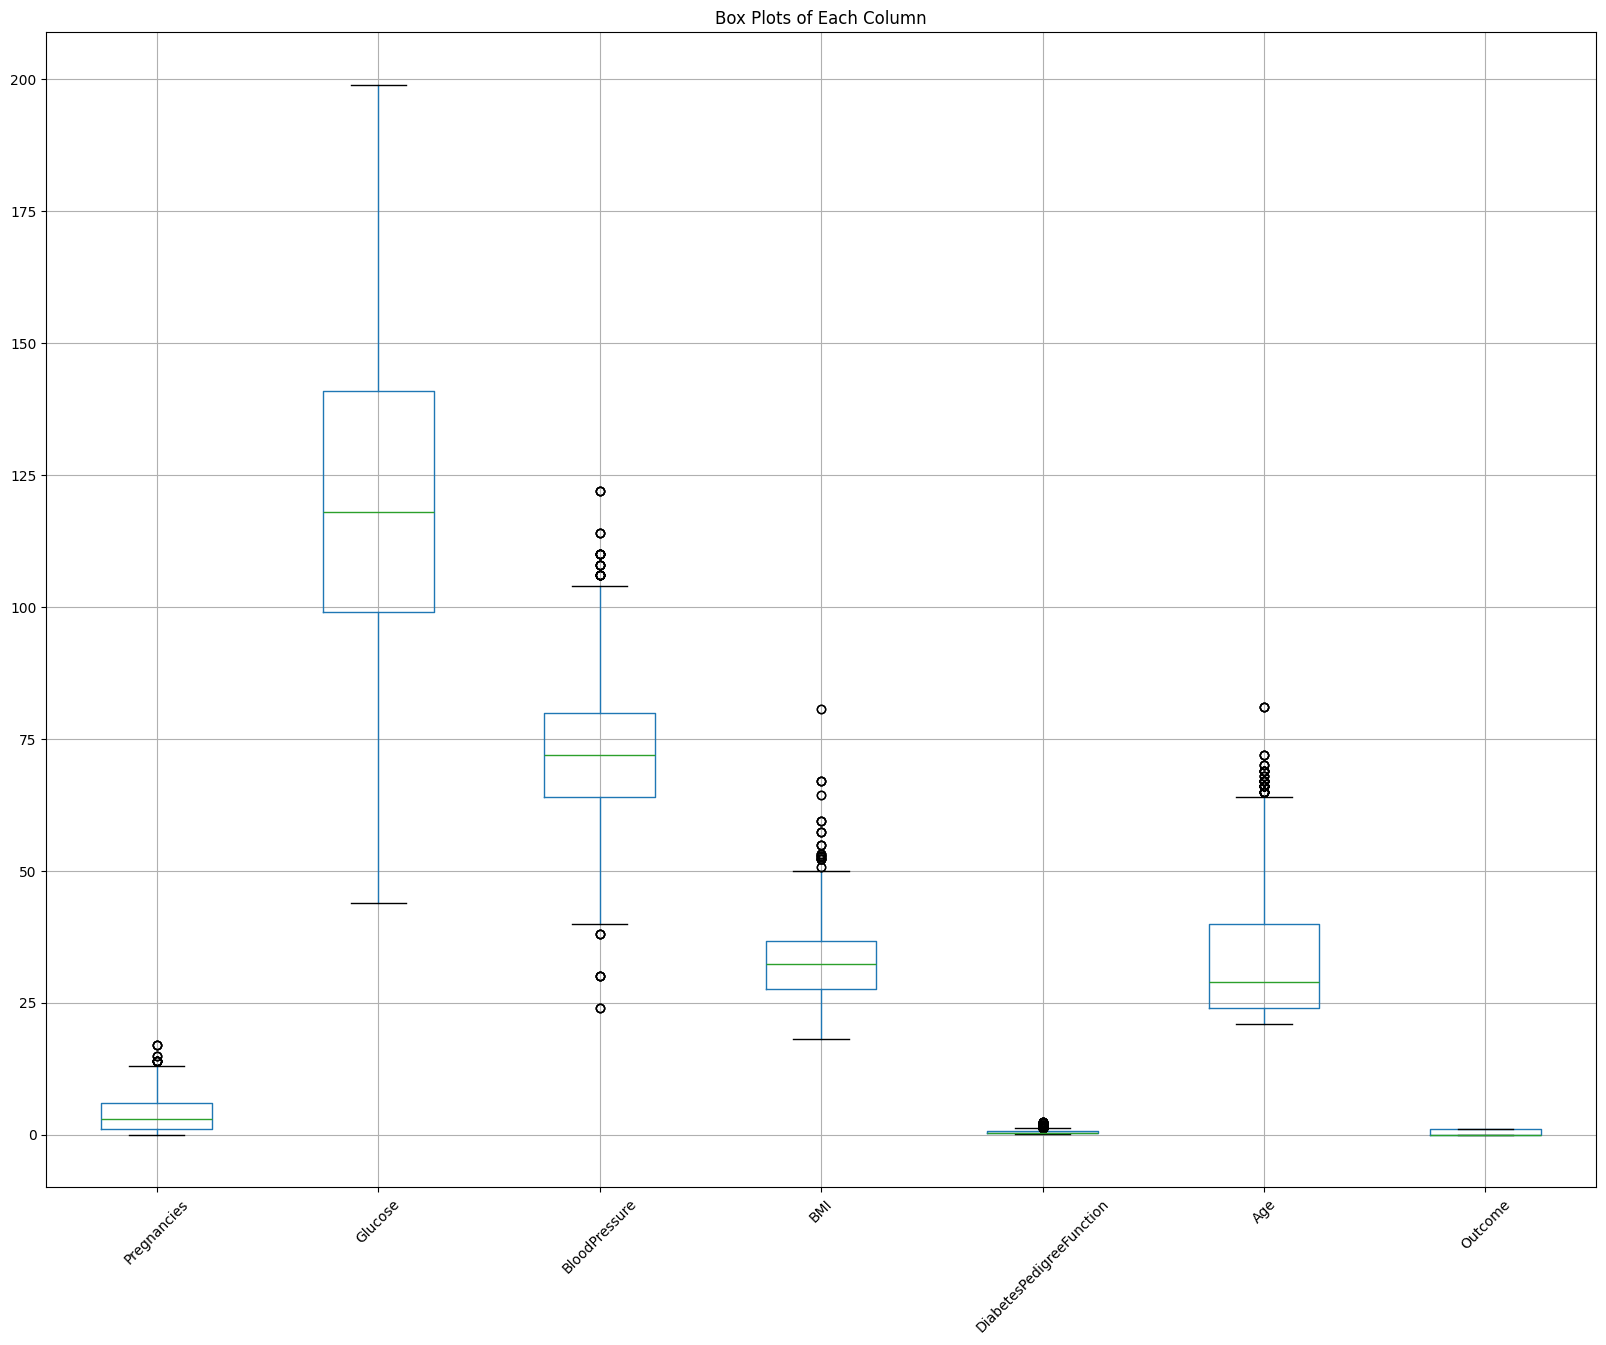

In [161]:
# Histograms for each column 
dataset.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Each Column')
plt.show()

# Box plots for each column -
plt.figure(figsize=(20, 15))
dataset.boxplot()
plt.title('Box Plots of Each Column')
plt.xticks(rotation=45)
plt.show()

###  Scatter Plots

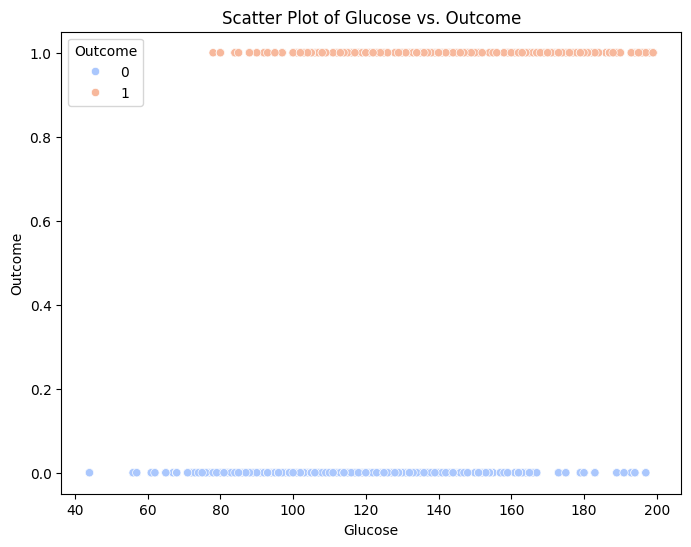

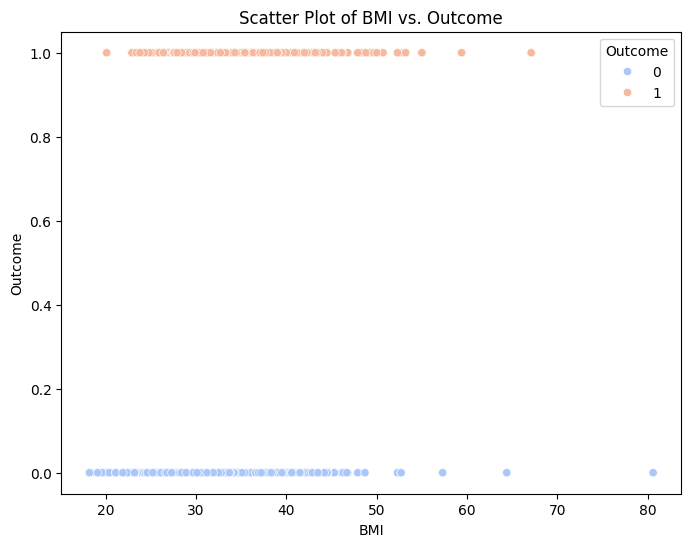

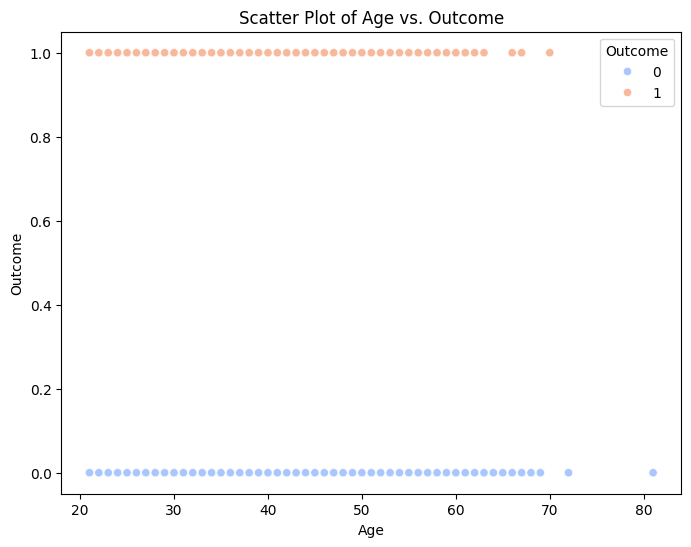

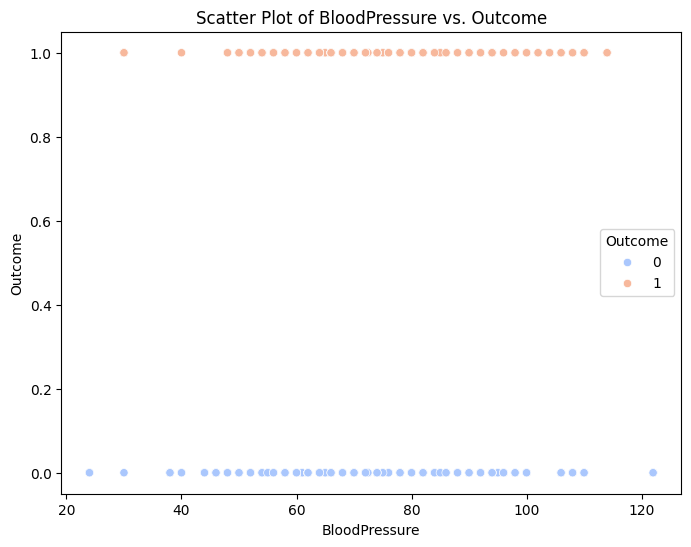

In [162]:
# Scatter plot of Glucose vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of Glucose vs. Outcome')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

# Scatter plot of BMI vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of BMI vs. Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()

# Scatter plot of Age vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Outcome')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

# Scatter plot of BloodPressure vs. Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BloodPressure', y='Outcome', data=dataset, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of BloodPressure vs. Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()


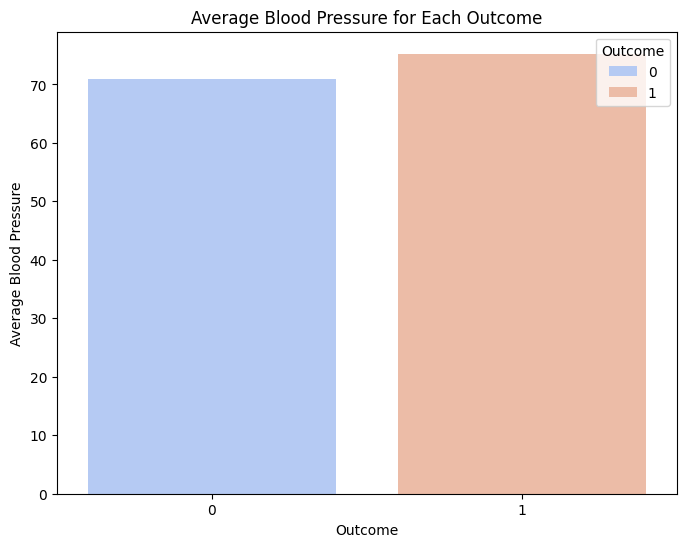

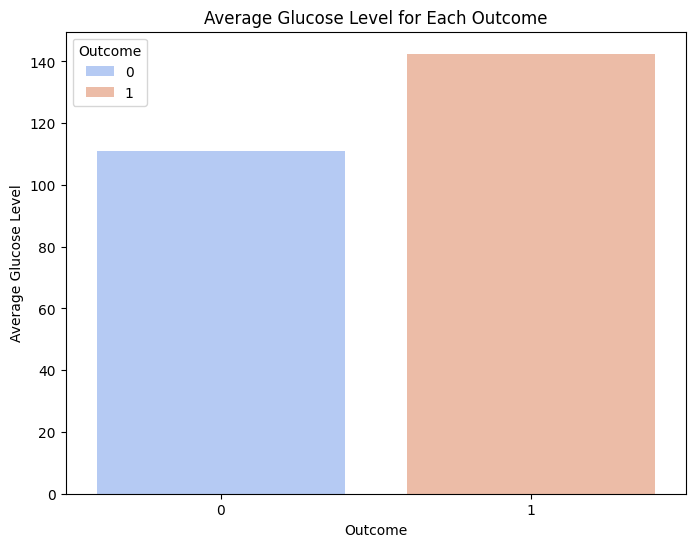

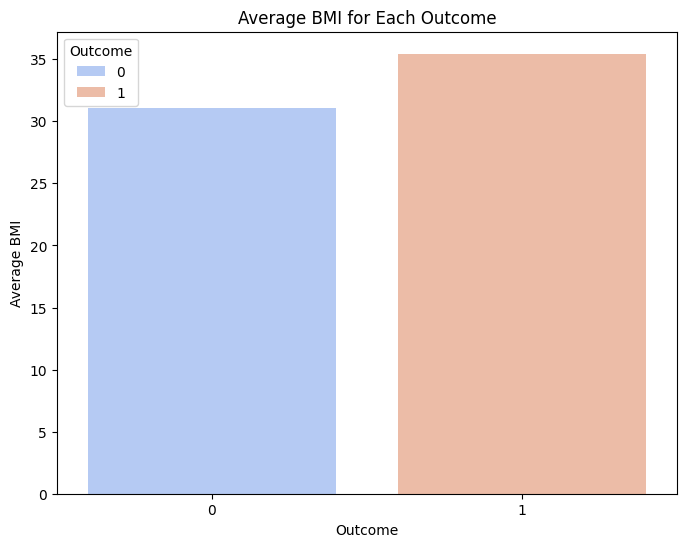

In [163]:
# Calculate the average blood pressure for each outcome
avg_blood_pressure = dataset.groupby('Outcome')['BloodPressure'].mean().reset_index()

# Bar chart of average blood pressure for each outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BloodPressure', data=avg_blood_pressure, palette='coolwarm', hue='Outcome')
plt.title('Average Blood Pressure for Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average Blood Pressure')
plt.show()

# Calculate the average glucose level for each outcome
avg_glucose = dataset.groupby('Outcome')['Glucose'].mean().reset_index()

# Bar chart of average glucose level for each outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Glucose', data=avg_glucose, palette='coolwarm', hue='Outcome')
plt.title('Average Glucose Level for Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average Glucose Level')
plt.show()

# Calculate the average BMI for each outcome
avg_bmi = dataset.groupby('Outcome')['BMI'].mean().reset_index()

# Bar chart of average BMI for each outcome
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='BMI', data=avg_bmi, palette='coolwarm', hue='Outcome')
plt.title('Average BMI for Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.show()





### Independent Variables vs Dependent
##### Independent:
BMI , Glucose , Blood Pressure , Age , 
##### Dependent:
Outcome

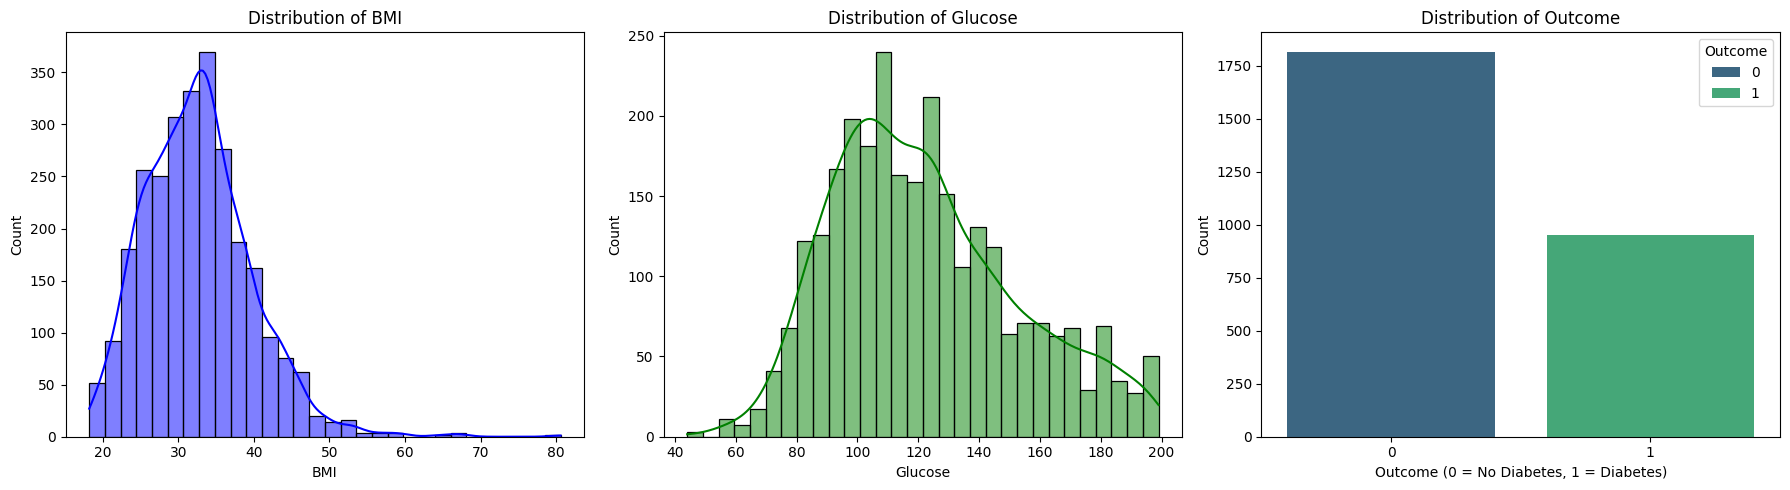

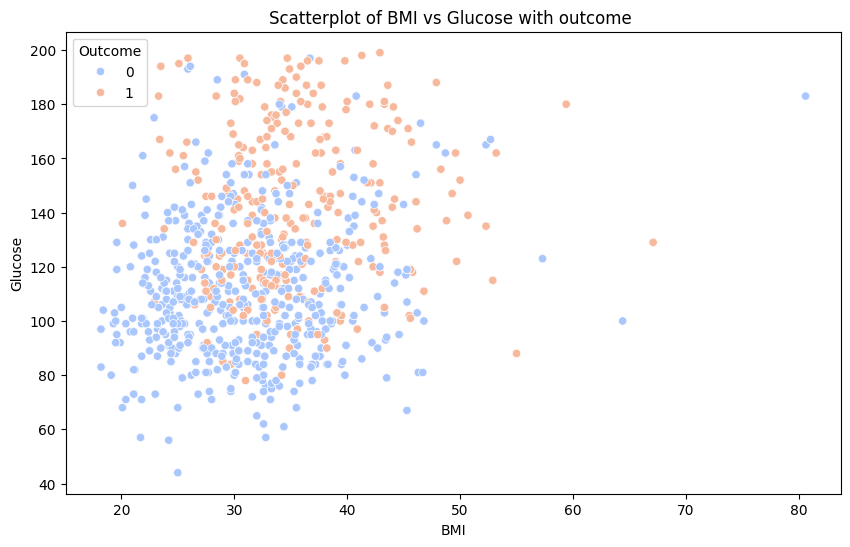

In [164]:



fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# BMI Distribution
sns.histplot(dataset['BMI'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of BMI')
axes[0].set_xlabel('BMI')

# Glucose Distribution
sns.histplot(dataset['Glucose'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Glucose')
axes[1].set_xlabel('Glucose')

# Outcome Distribution
sns.countplot(x=dataset['Outcome'], ax=axes[2], palette="viridis", hue=dataset['Outcome'])
axes[2].set_title('Distribution of Outcome')
axes[2].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Scatterplot for BMI vs. Glucose with Outcome hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['BMI'], y=dataset['Glucose'], hue=dataset['Outcome'], palette="coolwarm")
plt.title('Scatterplot of BMI vs Glucose with outcome ')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(title='Outcome')
plt.show()

### Model for Class Prediction

Due to the dependent variable being categorical not continuous , algorithms like Linear Regression will not work. Instead, i wil test out 2 Classification Algorithms : Logistic Regression and Random Forest. 

### Logistic Regression Analysis

[[324  43]
 [ 91  96]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       367
           1       0.69      0.51      0.59       187

    accuracy                           0.76       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554

Accuracy Score: 0.76


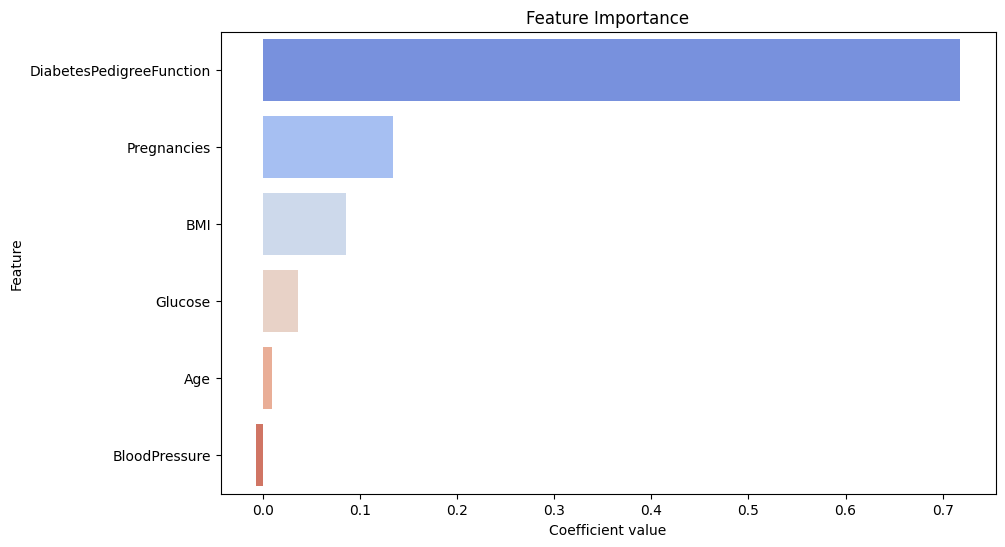

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = dataset['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

#get coefficients
coefficients = log_reg.coef_[0]


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
# Calculate the absolute value of the coefficients for ranking
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort the features by the absolute value of the coefficient
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm', hue='Feature')
plt.title('Feature Importance')
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.show()










True Negatives (323): Correctly predicted non-diabetic cases.   
False Positives (44): Non-diabetic cases misclassified as diabetic.   
False Negatives (88): Diabetic cases misclassified as non-diabetic.   
True Positives (99): Correctly predicted diabetic cases.   
Classification Report:

Precision: 0.79 for non-diabetic (Outcome = 0) and 0.69 for diabetic (Outcome = 1).   
Recall: 0.88 for non-diabetic and 0.53 for diabetic.   
F1-Score: 0.83 (non-diabetic) and 0.60 (diabetic).   
Imbalanced recall suggests the model struggles more with predicting diabetic cases. This may be due to the difference in cases used - 367 for the 0(non-Diabetic) and 187 for 1(Diabetic)
Overall Accuracy: 76%


### Attempted Improvement on Logistic Regression

[[301  66]
 [ 56 131]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       367
           1       0.66      0.70      0.68       187

    accuracy                           0.78       554
   macro avg       0.75      0.76      0.76       554
weighted avg       0.78      0.78      0.78       554

Accuracy Score: 0.78


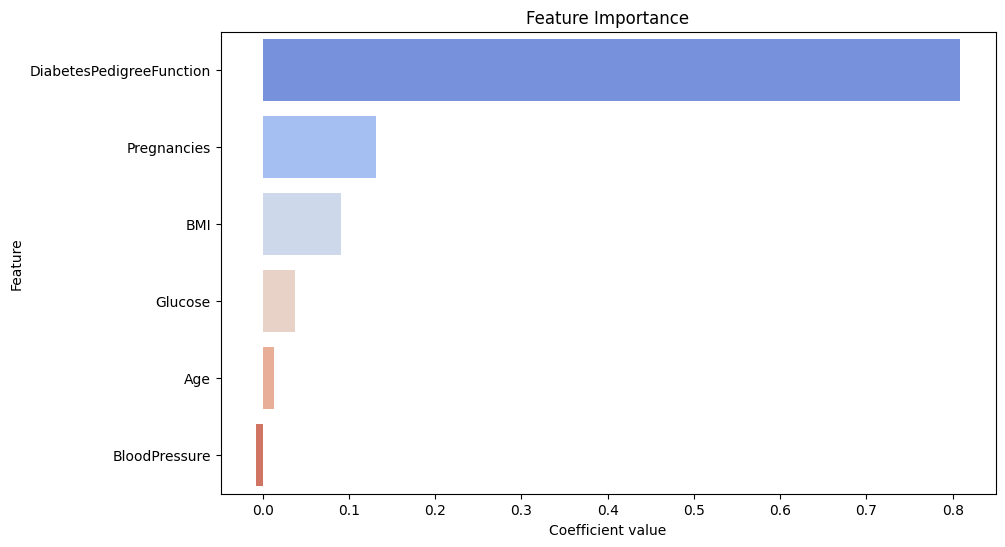

In [166]:
X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = dataset['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

#get coefficients
coefficients = log_reg.coef_[0]


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
# Calculate the absolute value of the coefficients for ranking
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort the features by the absolute value of the coefficient
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm', hue='Feature')
plt.title('Feature Importance')
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.show()

True Negatives (301): Correctly predicted non-diabetic cases.   
False Positives (66): Non-diabetic cases misclassified as diabetic.   
False Negatives (56): Diabetic cases misclassified as non-diabetic.   
True Positives (131): Correctly predicted diabetic cases.   
Classification Report:
Precision: 0.84 for non-diabetic (Outcome = 0) and 0.66 for diabetic (Outcome = 1).   
Recall: 0.82 for non-diabetic and 0.70 for diabetic.   
F1-Score: 0.83 for non-diabetic and 0.68 for diabetic.   
Imbalanced Recall:
The model still struggles more with predicting diabetic cases (Outcome = 1), despite using class weight balancing. While the recall for non-diabetic cases (0.82) is quite good, the recall for diabetic cases (0.70) is still lower, indicating that a significant portion of diabetic cases are misclassified. This imbalance in recall is likely due to the natural class imbalance in the dataset, with 367 non-diabetic cases and only 187 diabetic cases.

Further techniques could be used to help improve this model, such as Resampling models such as SMOTE , but instead i have decided to switch to a Random Forest Classifier as this will be better at dealing with the imbalance of this dataset.

### Random Forest Classifier


[[364   3]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Random Forest Accuracy Score: 0.98
                    Feature  Importance
0                   Glucose    0.308331
1                       BMI    0.194589
2             BloodPressure    0.102361
3                       Age    0.156795
4               Pregnancies    0.089691
5  DiabetesPedigreeFunction    0.148233


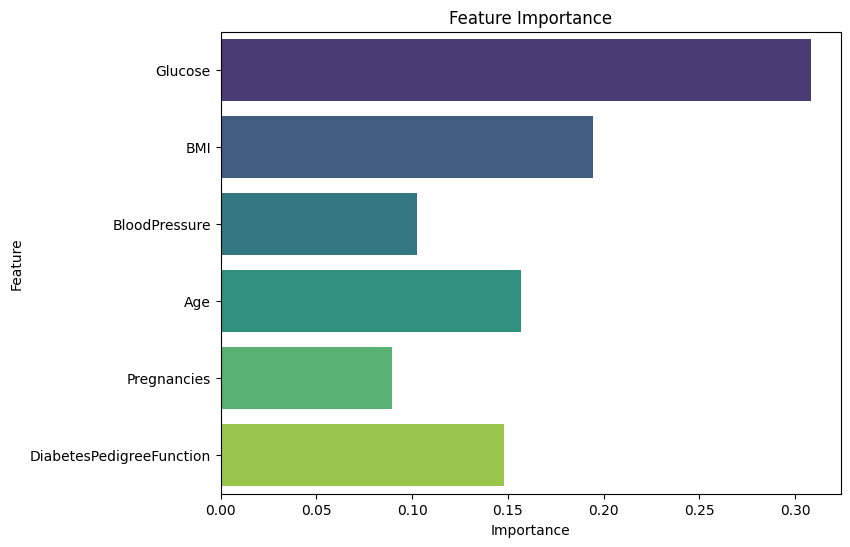

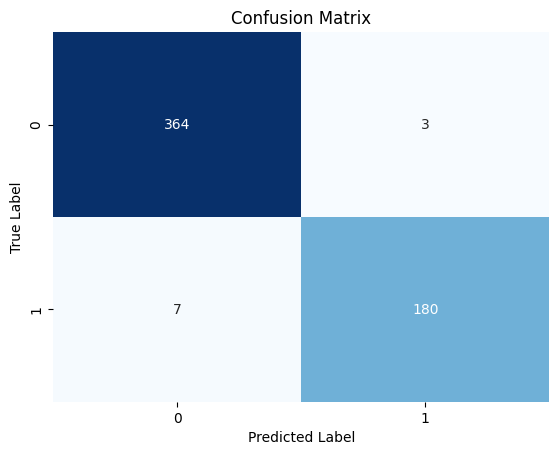

In [167]:
from sklearn.ensemble import RandomForestClassifier

X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = dataset['Outcome']
#print(X)  debugging

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Score: {accuracy_rf:.2f}')

importances = rf.feature_importances_
features = X_train.columns

#print(importances) debugging

# create data frame to pair feature names with their importance (This was made after a plotting error)
feature_importances = pd.DataFrame(
    {'Feature': features,
    'Importance': importances
    }
)
print(feature_importances) #debugging

#  feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()





Despite the higher correlation in the heatmap then the DiabetesPedigreeFunction, Pregnancies will be dropped from the Variables used for the RandomForest as it has the lowest feature importance value in the graph (under 0.1 / 10%)


#### Improving upon Random Forest - Remove Pregnancies Variable

[[363   4]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Random Forest Accuracy Score: 0.98


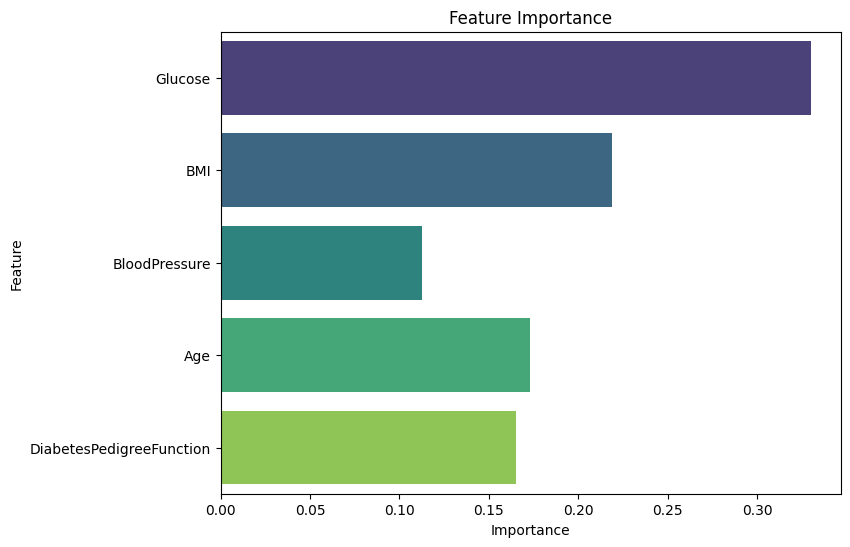

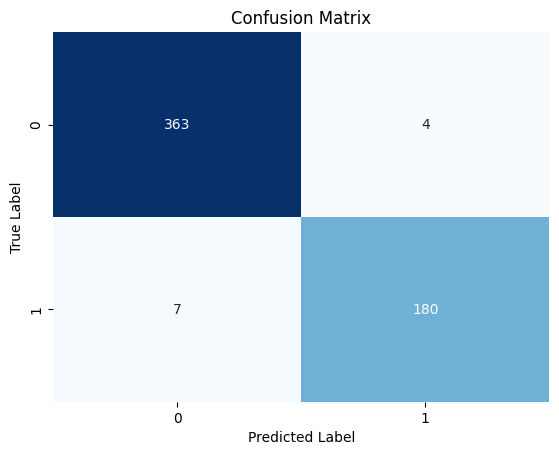

In [168]:
from sklearn.ensemble import RandomForestClassifier

X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age', 'DiabetesPedigreeFunction']]
y = dataset['Outcome']
#print(X)  debugging

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Score: {accuracy_rf:.2f}')

importances = rf.feature_importances_
features = X_train.columns

#print(importances) debugging

# create data frame to pair feature names with their importance (This was made after a plotting error)
feature_importances = pd.DataFrame(
    {'Feature': features,
    'Importance': importances
    }
)
#print(feature_importances) debugging

#  feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Due to making the performance worse then the first model including pregnancies , i have decided to drop the DiabetesPedigreeFunction due to the lack of correlation to the outcome variable (from the earlier heatmap) compared to the others remaining. I Will test putting pregnancies back to see if this makes any difference in performance.  

### Improving Random Forest Classifier - Remove DiabetesPedigreeFunction and reAdd pregnancies

[[364   3]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554

Random Forest Accuracy Score: 0.98


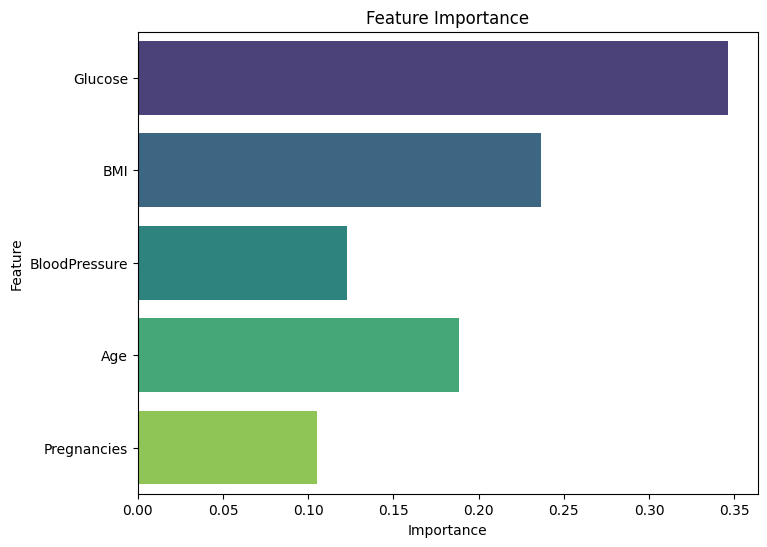

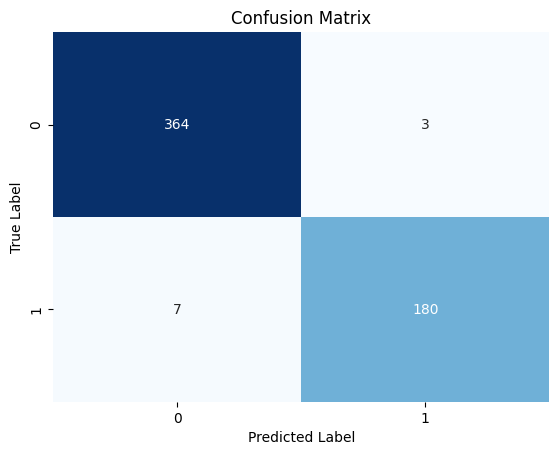

In [169]:
from sklearn.ensemble import RandomForestClassifier

X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age', 'Pregnancies']]
y = dataset['Outcome']
#print(X)  debugging

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Score: {accuracy_rf:.2f}')

importances = rf.feature_importances_
features = X_train.columns

#print(importances) debugging

# create data frame to pair feature names with their importance (This was made after a plotting error)
feature_importances = pd.DataFrame(
    {'Feature': features,
    'Importance': importances
    }
)
#print(feature_importances) debugging

#  feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Due to continued low importance and no increase in performance from the first model, a final test without pregnancies will be done to check any improvements in performance.

[[366   1]
 [  7 180]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.99       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.99      0.99      0.99       554

Random Forest Accuracy Score: 0.99


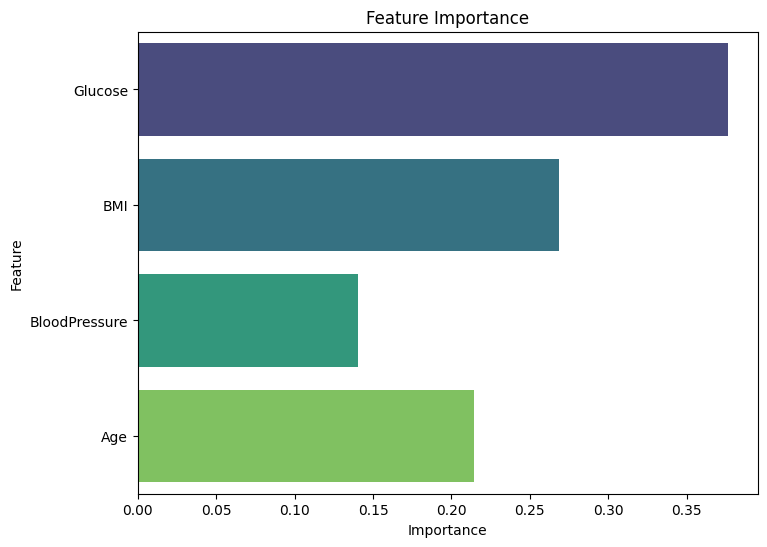

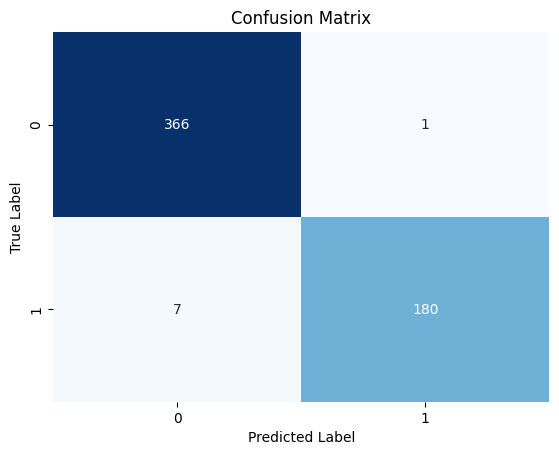

In [170]:
from sklearn.ensemble import RandomForestClassifier

X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age']]
y = dataset['Outcome']
#print(X)  debugging

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Score: {accuracy_rf:.2f}')

importances = rf.feature_importances_
features = X_train.columns

#print(importances) debugging

# create data frame to pair feature names with their importance (This was made after a plotting error)
feature_importances = pd.DataFrame(
    {'Feature': features,
    'Importance': importances
    }
)
#print(feature_importances) debugging

#  feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

3 false positive 7 false negative
High in all scores 
performing very well , dataset is accurate for modelling using random forest.

### Overall breakdown of Final RFC model to solve Problem
Problem: Is the Dataset a good fit to be able to classify Diabetes Patients based on variables   
Final Model stats: 99 % Accuracy , High recall (96% + on Both scores), high F1 Scores  

These Scores Represent that The final model (Random Forest Classifier) if very effective with this dataset at classifying Patients based on 4 variables(Glucose, BMI, BloodPressure, Age). These 4 variables turned out to be the 4 that provided the Model with the best accuracy , as including DiabetesPedigreeFunction and Pregnancies to go down in accuracy to 98%.   
DiabetesPedigreeFunction, while having higher importance in the RFC graphs, did not present much useful predictive.   information, illustrated when the model with that removed went up to 99% accuracy.    
Pregnancies had a higher feature correlation with outcome then other variables, but was dropped due to low feature importance in the RFC.
These scores represent that the dataset is very very accurate with predictions even with the other 2 variables, but the optimal Classification performance can be achieved by removing them.
The Random Forest Classifier ended up being the best option tried for this problem , as it was able to deal with the inbalanced dataset a lot better then Logistic Regression. SVM is another option that could be tried, but due to the high scores of the random forest Classifier model it doesnt seem neccessary to do so. 

### Decision Tree Classifier 

This decision tree was built based on the 4 best variables from the RFC model to visualise the decision tree used

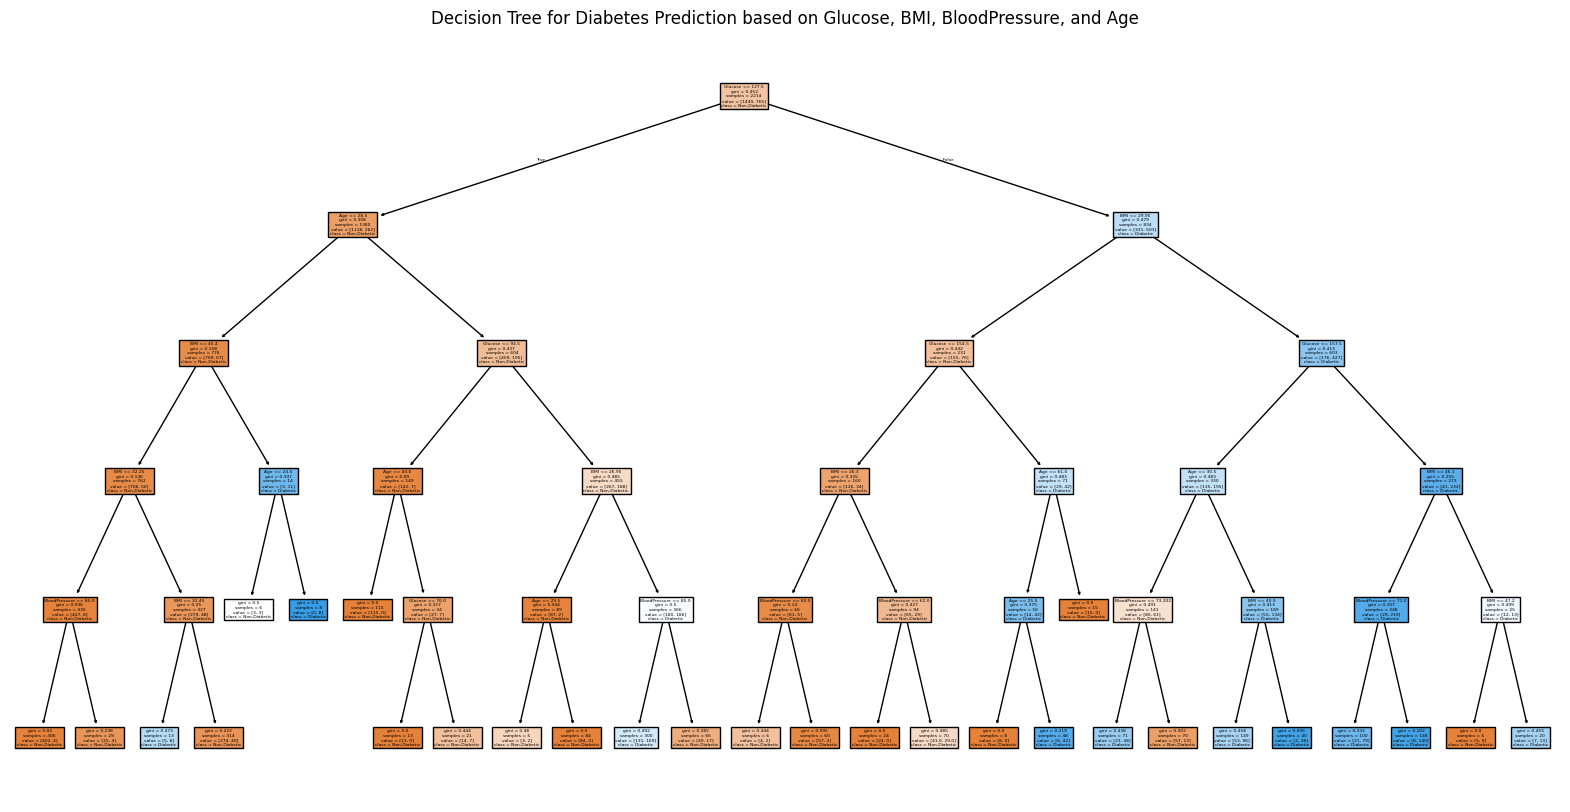

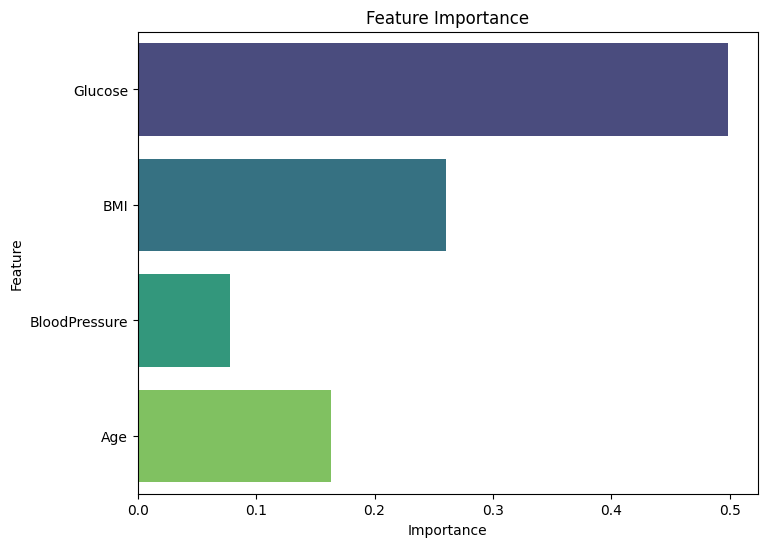

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X = dataset[['Glucose', 'BMI', 'BloodPressure', 'Age']]
y = dataset['Outcome']
#print(X)  debugging

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
# min samples split = require a minimum number of samples to split an internal node 
# min samples leaf = require a minimum number of samples to be a leaf node - avoids creations for outliers
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5 , min_samples_split=5 , min_samples_leaf=5)   
tree_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=['Glucose', 'BMI', 'BloodPressure', 'Age'], class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.title('Decision Tree for Diabetes Prediction based on Glucose, BMI, BloodPressure, and Age')
plt.show()

importances = tree_clf.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette='viridis', hue=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
